<blockquote>
    <h1>Exercise 10.11</h1>
    <p>On the book website, www.StatLearning.com, there is a gene expression data set (<code>Ch10Ex11.csv</code>) that consists of 40 tissue samples with measurements on 1,000 genes. The first 20 samples are from healthy patients, while the second 20 are from a diseased group.</p>
    <ol>
        <li>Load in the data using <code>read.csv()</code>. You will need to select <code>header=F</code>.</li>
        <li>Apply hierarchical clustering to the samples using correlation-based distance, and plot the dendrogram. Do the genes separate the samples into the two groups? Do your results depend on the type of linkage used?</li>
        <li>Your collaborator wants to know which genes differ the most across the two groups. Suggest a way to answer this question, and apply it here.</li>
    </ol>
</blockquote>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# https://stackoverflow.com/questions/34398054/ipython-notebook-cell-multiple-outputs
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all" 

from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline

<h3>Exercise 10.11.1</h3>
<blockquote>
    <i>Load in the data using <code>read.csv()</code>. You will need to select <code>header=F</code>.</i>
</blockquote>

In [2]:
df = pd.read_csv("../../DataSets/Ch10Ex11/Ch10Ex11.csv", header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
0,-0.961933,0.441803,-0.975005,1.417504,0.818815,0.316294,-0.024967,-0.063966,0.031497,-0.350311,...,-0.509591,-0.216726,-0.055506,-0.484449,-0.521581,1.949135,1.324335,0.468147,1.061100,1.655970
1,-0.292526,-1.139267,0.195837,-1.281121,-0.251439,2.511997,-0.922206,0.059543,-1.409645,-0.656712,...,1.700708,0.007290,0.099062,0.563853,-0.257275,-0.581781,-0.169887,-0.542304,0.312939,-1.284377
2,0.258788,-0.972845,0.588486,-0.800258,-1.820398,-2.058924,-0.064764,1.592124,-0.173117,-0.121087,...,-0.615472,0.009999,0.945810,-0.318521,-0.117889,0.621366,-0.070764,0.401682,-0.016227,-0.526553
3,-1.152132,-2.213168,-0.861525,0.630925,0.951772,-1.165724,-0.391559,1.063619,-0.350009,-1.489058,...,-0.284277,0.198946,-0.091833,0.349628,-0.298910,1.513696,0.671185,0.010855,-1.043689,1.625275
4,0.195783,0.593306,0.282992,0.247147,1.978668,-0.871018,-0.989715,-1.032253,-1.109654,-0.385142,...,-0.692998,-0.845707,-0.177497,-0.166491,1.483155,-1.687946,-0.141430,0.200778,-0.675942,2.220611


<h3>Exercise 10.11.2</h3>
<blockquote>
    <i>Apply hierarchical clustering to the samples using correlation-based distance, and plot the dendrogram. Do the genes separate the samples into the two groups? Do your results depend on the type of linkage used?</i>
</blockquote>

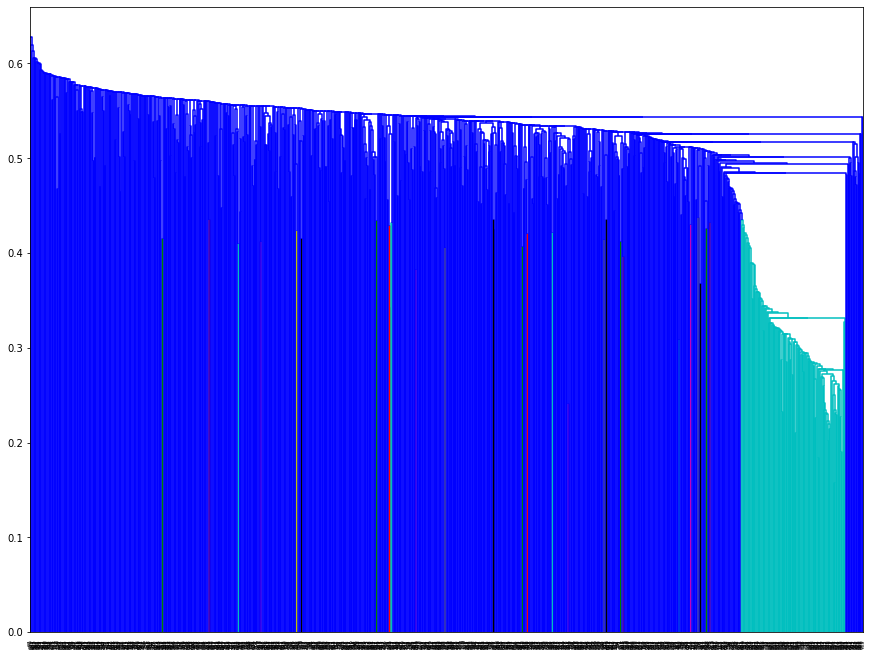

In [3]:
fig, ax = plt.subplots(1, 1, constrained_layout=True, figsize=(12, 9)) 
linked = linkage(df, method='single', metric='correlation') # Perform hierarchical/agglomerative clustering.
dend = dendrogram(linked, labels=df.index, ax=ax)

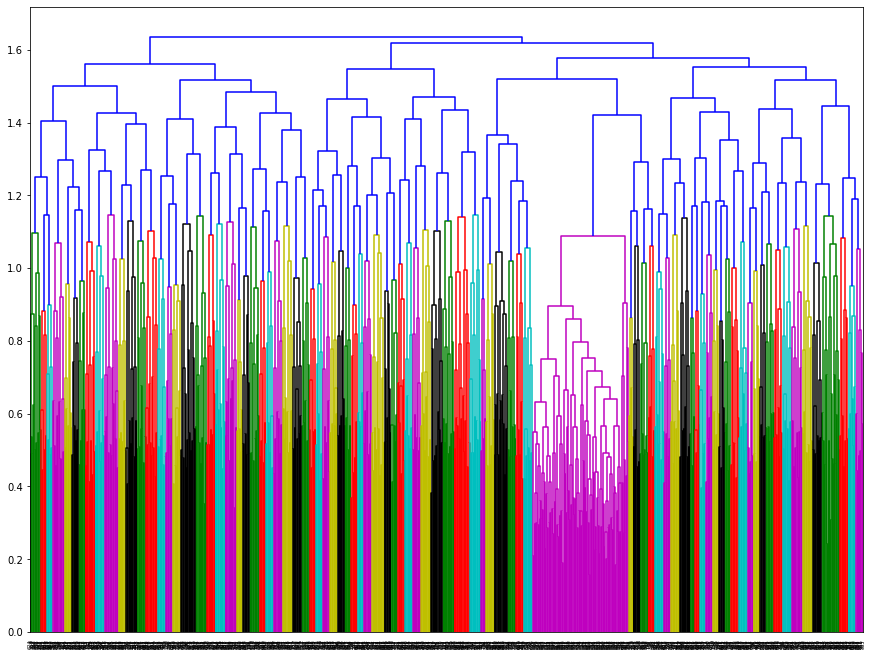

In [4]:
fig, ax = plt.subplots(1, 1, constrained_layout=True, figsize=(12, 9)) 
linked = linkage(df, method='complete', metric='correlation') # Perform hierarchical/agglomerative clustering.
dend = dendrogram(linked, labels=df.index, ax=ax)

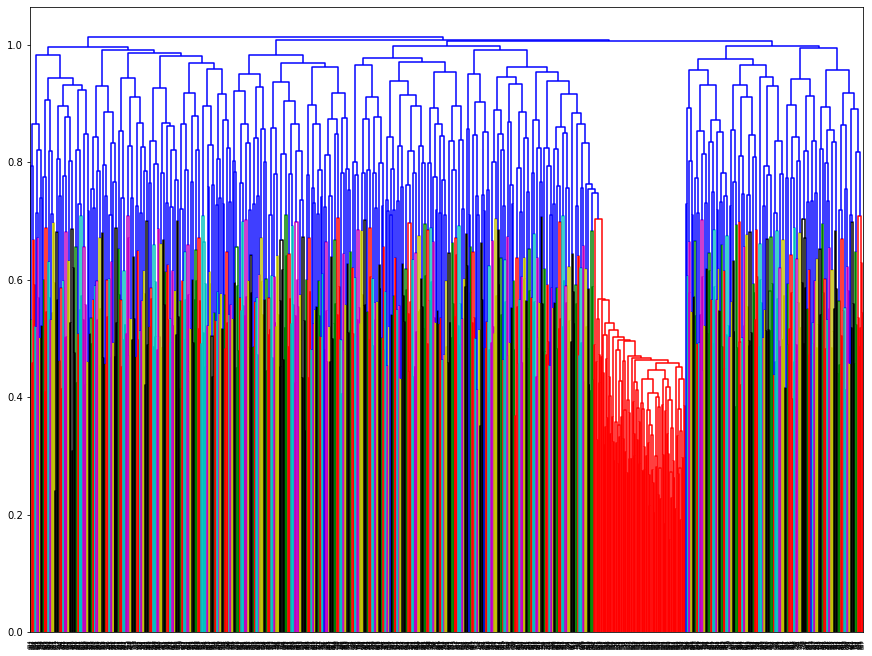

In [5]:
fig, ax = plt.subplots(1, 1, constrained_layout=True, figsize=(12, 9)) 
linked = linkage(df, method='average', metric='correlation') # Perform hierarchical/agglomerative clustering.
dend = dendrogram(linked, labels=df.index, ax=ax)

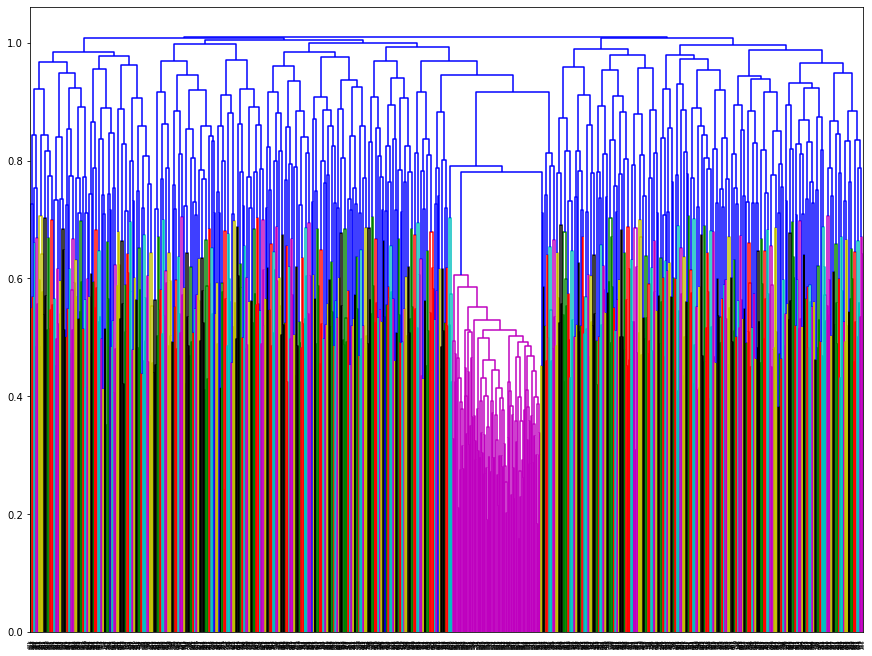

In [6]:
fig, ax = plt.subplots(1, 1, constrained_layout=True, figsize=(12, 9)) 
linked = linkage(df, method='weighted', metric='correlation') # Perform hierarchical/agglomerative clustering.
dend = dendrogram(linked, labels=df.index, ax=ax)

<h3>Exercise 10.11.3</h3>
<blockquote>
    <i>Your collaborator wants to know which genes differ the most across the two groups. Suggest a way to answer this question, and apply it here.</i>
</blockquote>

<p>We will perform $K$-means clustering with $K = 2$ and plot the results against the first two principal component score vectors.</p>

In [7]:
pipeline = Pipeline([
    ('scaling', StandardScaler()), 
    ('pca', PCA(n_components=2))
])
principal_components = pipeline.fit_transform(df)
pipeline['pca'].explained_variance_ratio_

array([0.16130137, 0.03248764])

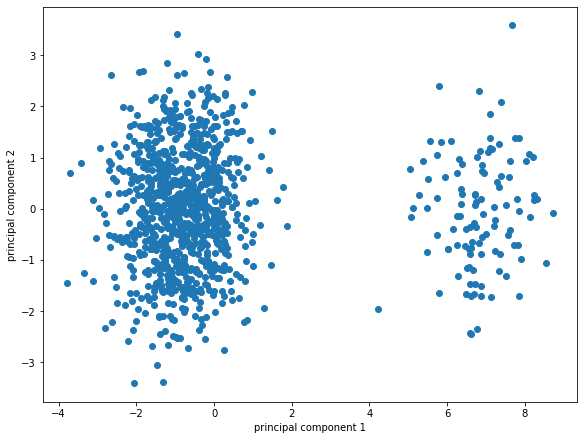

In [8]:
fig, ax = plt.subplots(1, 1, constrained_layout=True, figsize=(8, 6))
_ = ax.scatter(q
    principal_components[:, 0],
    principal_components[:, 1]
)

_ = ax.set_xlabel('principal component 1')
_ = ax.set_ylabel('principal component 2')

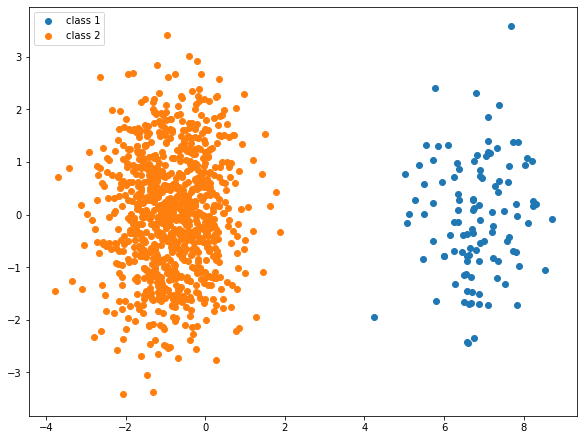

In [9]:
k = 2
kmeans = KMeans(n_clusters=k, n_jobs=-1, random_state=42)
y_pred = kmeans.fit_predict(df)
df_y_pred = pd.DataFrame({'y': y_pred})
classes = np.unique(y_pred)
fig, ax = plt.subplots(1, 1, constrained_layout=True, figsize=(8, 6))
for i, class_ in enumerate(classes):
    mask = df_y_pred['y'] == class_
    _ = ax.scatter(
        principal_components[:, 0][mask],
        principal_components[:, 1][mask],
        label=f'class {i + 1}'
    )
ax.legend()